In [ ]:
IQR의 범위 = pct75 - pct25

이상치의 범위:  upper = pct75 + 1.5 * iqr
               under = pct25 - 1.5 * iqr 

다수의 약한 학습기를 결합해 변동성을 줄여 예측오류를 줄이고 성능을 개선한 기법은?
-> 앙상블

In [ ]:
언더 샘플링 : 많은 데이터 세트 -> 적은 데이터 세트로 감소시키는 방식
오버샘플링 : 적은 데이터 세트 -> 많은 데이터 세트로 증식시키는 방식 

In [ ]:
여러 알고리즘을 사용하여 예측 결과를 만들고 그 예측 결과들을 모아 다시 학습하여 최종 예측 결과물을
도출하는 앙상블 기법은?
-> stacking(스태킹)

SMOTE 기법은 정밀도 지표보다 재현율 지표를 높일 때 더 효율적이다.(O,X)
-> O

In [1]:
import pydataset 

mpg = pydataset.data('mpg') 

# 회귀

In [10]:
import numpy as np
import matplotlib.pyplot as plt

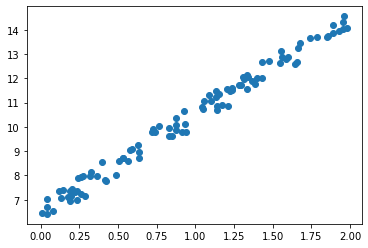

In [11]:
np.random.seed(0)

#여기저기 점을 퍼트리려면?
X = 2*np.random.rand(100, 1)
y = 6 + 4*X + np.random.rand(100,1)

plt.scatter(X,y)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # 절편 맞춰서 찾아줘

lr = model.fit(X,y)

# 안에 정보 보기
lr.coef_
lr.intercept_

array([6.55808002])

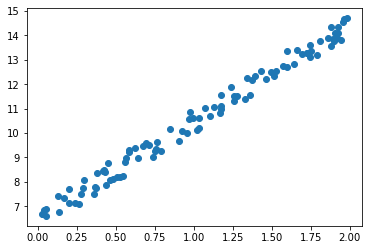

In [13]:
x = 2*np.random.rand(100)
y = 6 + 4*x + np.random.rand(100)

plt.scatter(x,y)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

lr = model.fit(x.reshape(-1,1),y)

lr.coef_
lr.intercept_

6.528111295837924

In [16]:
x[:, np.newaxis] # 이건 x.reshape(-1,1)와 같은 방법

array([[0.62359176],
       [1.39268698],
       [0.75550368],
       [0.35920736],
       [0.04935746],
       [0.13449926],
       [1.35878555],
       [0.90739369],
       [1.07315842],
       [1.79334259],
       [1.98067789],
       [0.43379397],
       [1.32615641],
       [0.52664475],
       [0.041302  ],
       [1.51675731],
       [0.6400343 ],
       [0.76692779],
       [1.17663423],
       [1.66209691],
       [1.25796369],
       [1.74530131],
       [0.54708407],
       [1.59609367],
       [0.37127189],
       [1.90558331],
       [1.37497655],
       [0.43101535],
       [1.89474118],
       [1.46171161],
       [0.50788329],
       [0.42662395],
       [1.03640143],
       [0.05132544],
       [0.41494015],
       [0.84937094],
       [0.74833996],
       [0.92715085],
       [0.55525741],
       [1.17356869],
       [1.72771121],
       [0.23506371],
       [1.03475821],
       [0.26413621],
       [1.43371936],
       [0.79211941],
       [1.13084262],
       [0.366

# 다중회귀분석

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

print('Bosteon 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Bosteon 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


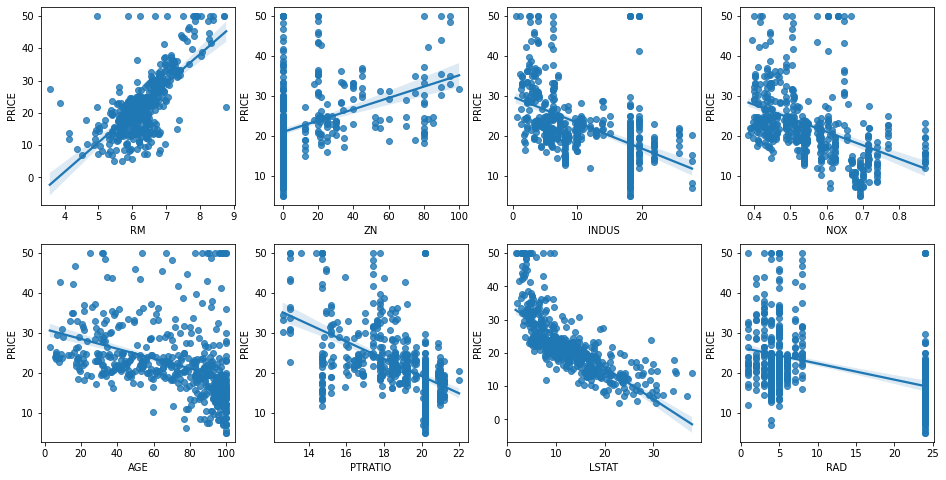

In [18]:
# 상관관계
fig, axs = plt.subplots(figsize= (16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print("Variance score : {0:.3f}".format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [20]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [21]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [22]:
# sqrt() 함수를 적용해서 RMSE 구하기
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# crosscross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829


# 다항 회귀

In [23]:
from sklearn.preprocessing import PolynomialFeatures # 피처를 바꿔줌
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline # 순서대로 여러가지를 구현한다.
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:,0]**2 + 4*X[:, 0]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.07 0.07 0.14 0.22 0.29 0.29 0.43 0.65 0.94]


# 과소적합 과적합

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=200)
scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1*scores)
np.mean(rmse)

5.340529728782316

In [25]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=200)
scores = cross_val_score(lasso, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse = np.sqrt(-1*scores)
np.mean(rmse)

8.602271701408876